<a href="https://colab.research.google.com/github/kikiru328/Bone_Detection/blob/main/%ED%98%9C%EC%A0%95/%EC%9D%B4%EC%83%81%EC%B9%98%ED%83%90%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import math
%matplotlib inline

## 데이터 탐색


In [ ]:
%pwd

'C:\\workspace\\cakd3\\team2'

In [ ]:
df.head()

In [ ]:
import pandas as pd

csv_path = "./team2_data/data/BoneAge/"
df1 = pd.read_excel(csv_path+"BA_total.xlsx")
df1.head()

In [ ]:
df1.isnull().sum()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
m = df1["성별(F:2,M:1)"].loc[df1["성별(F:2,M:1)"]==1]
f = df1["성별(F:2,M:1)"].loc[df1["성별(F:2,M:1)"]==2]
plt.hist([m, f], bins=2)
plt.xlabel("male", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

In [ ]:
# 파생변수 골연령(개월), 정규화된 값 추가
# df1['boneage'] = df1['BA_total']*12
# ba_mean = df1.boneage.mean()
# ba_std = df1.boneage.std()
# df1["BA_z"] = (df1.boneage-ba_mean)/ba_std

from scipy.stats import zscore
df1['BA_zscore'] = zscore(df1['BA_total'])

In [ ]:
df1.head(2)

In [ ]:
df1.columns

In [ ]:
def cat_age(x):
    for i in range(3,19):
        if i-1 <= x < i : 
            x = i-1
    return x

In [ ]:
df1['age'] = df1['검사 시 나이'].map(cat_age)

In [ ]:
df1.head(3)

In [ ]:
x1 = df1['age']
x2 = df1['BA_total']
plt.hist([x1, x2], bins=9, label=['original age','bone age'])
plt.xlabel("Age", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title('Age')
plt.legend()
plt.show()

In [ ]:
plt.scatter(x=df1["BA_total"], y=df1["신장"])
plt.xlabel("Bone AGE", fontsize=16)
plt.ylabel("Height", fontsize=16)
plt.show()

In [ ]:
# 이상치 보고 삭제하기

In [ ]:
df1[df1["신장"] < 80]  # F - 107 이상한것으로 나타남.

### 성장도표

In [ ]:
# 성장도표
df2 = pd.read_excel(csv_path+"Tall_korea.xls")
df2.head()

In [ ]:
df2['성별'].value_counts()

In [ ]:
# df2['만나이(세)'].value_counts().sort_index()

In [ ]:
df2[df2['만나이(세)'].notnull()]

## 데이터 탐색 (1주차 제공해주신 자료)

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

### 골연령 그래프

In [1]:
# # 파생변수 골연령(개월), 정규화된 값 추가
# df['boneage'] = df.BA*12
# ba_mean = df.boneage.mean()
# ba_std = df.boneage.std()
# df["BA_z"] = (df.boneage-ba_mean)/ba_std
# df.head()

In [ ]:
df['BA_total'] = (df['BA 1'] + df['BA 2'])/2

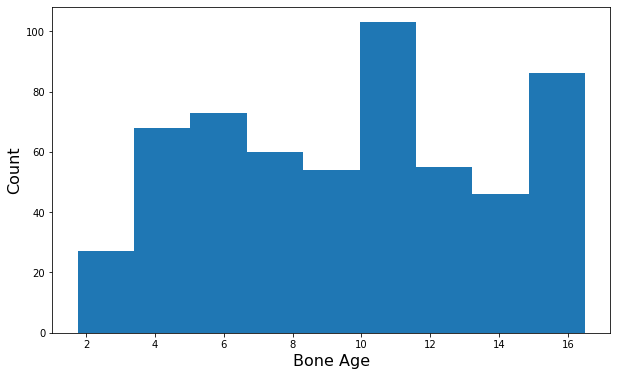

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['BA_total'], bins=9)
plt.xlabel("Bone Age", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

/home/centos/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/home/centos/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


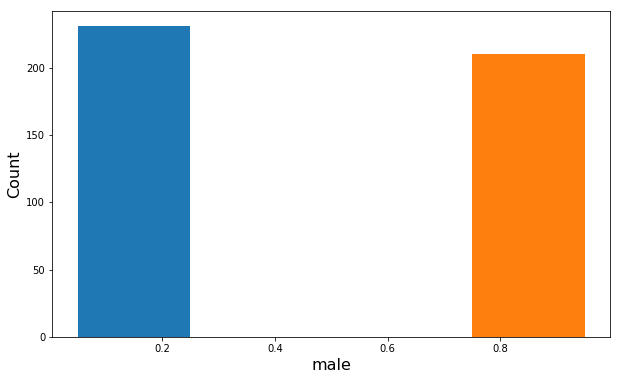

In [ ]:
plt.figure(figsize=(10,6))
m = df["성별"].loc[df["성별"]==0]
f = df["성별"].loc[df["성별"]==1]
plt.hist([m, f], bins=2)
plt.xlabel("male", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

### 성별-골연령 히스토그램

In [ ]:
#파생변수 골연령대 추가
df["BA_GROUP"] = df["BA"].map(lambda x: int(x))
df.head()

In [ ]:
#성별 값 1, 2를 텍스트 Male, Female로 변경
df["성별"] = df["성별"].replace([0, 1], ["Male", "Female"])
df.head()

In [ ]:
#성별, BA 연령대로 피벗테이블
df_ = df.loc[:, ["filename", "성별", "BA_GROUP"]]
df_pivot = df_.pivot_table(index=["성별"], columns=["BA_GROUP"], values=["filename"], aggfunc=["count"], fill_value=0, margins=True)
df_pivot

In [ ]:
#골연령대 기준으로 히스토그램
plt.figure(figsize=(10,6))
m = df.loc[df["성별"]=="Male"]["BA_GROUP"]
f = df.loc[df["성별"]=="Female"]["BA_GROUP"]
plt.hist([m, f], bins=9)
plt.legend(["Male", "Female"], fontsize=20)
plt.xlabel("Bone Age(Group)", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

In [ ]:
#골열령 기준으로 히스토그램
plt.figure(figsize=(10,6))
m = df.loc[df["성별"]=="Male"]["BA"]
f = df.loc[df["성별"]=="Female"]["BA"]
plt.hist([m, f], bins=45)
plt.legend(["Male", "Female"], fontsize=20)
plt.xlabel("Bone Age", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.show()

### 신장-골연령 산점도

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x=df["BA"], y=df["신장"])
plt.xlabel("Bone AGE", fontsize=16)
plt.ylabel("Height", fontsize=16)
plt.show()